In [1]:
import pandas as pd

In [2]:
df_call= pd.read_csv('/kaggle/input/montcoalert/911.csv')

In [3]:
df_call.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
df_call.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [6]:

print(f'Shape of data is {df_call.shape}')

Shape of data is (663522, 9)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


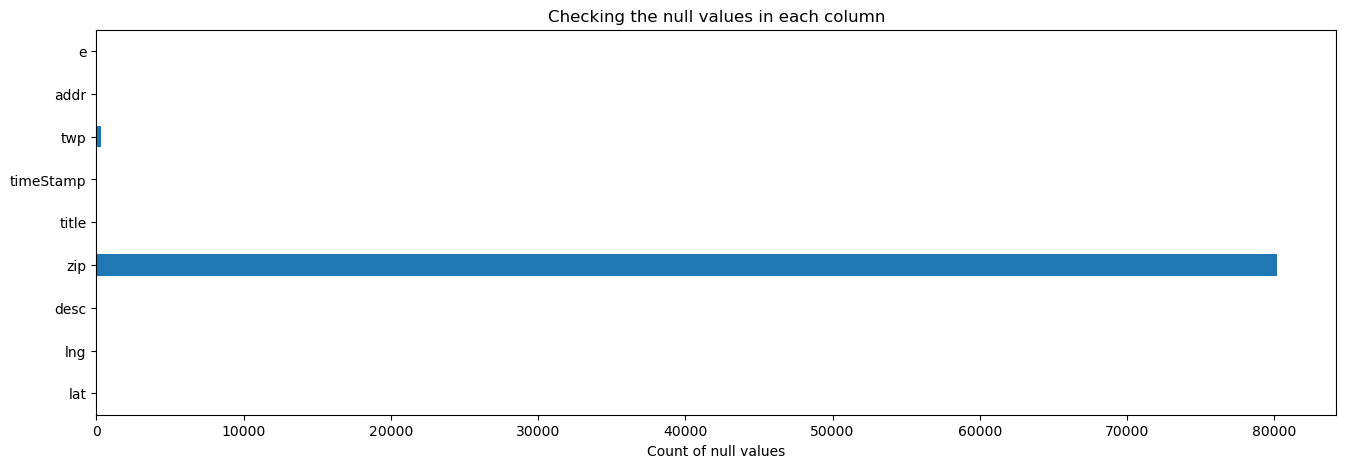

In [8]:
plt.figure(figsize=(16,5))
df_call.isnull().sum().plot(kind='barh')
plt.title('Checking the null values in each column')
plt.xlabel('Count of null values')
plt.show()

   index      0
0    lat      0
1    lng      0
2   desc      0
3    zip  80199
4  title      0


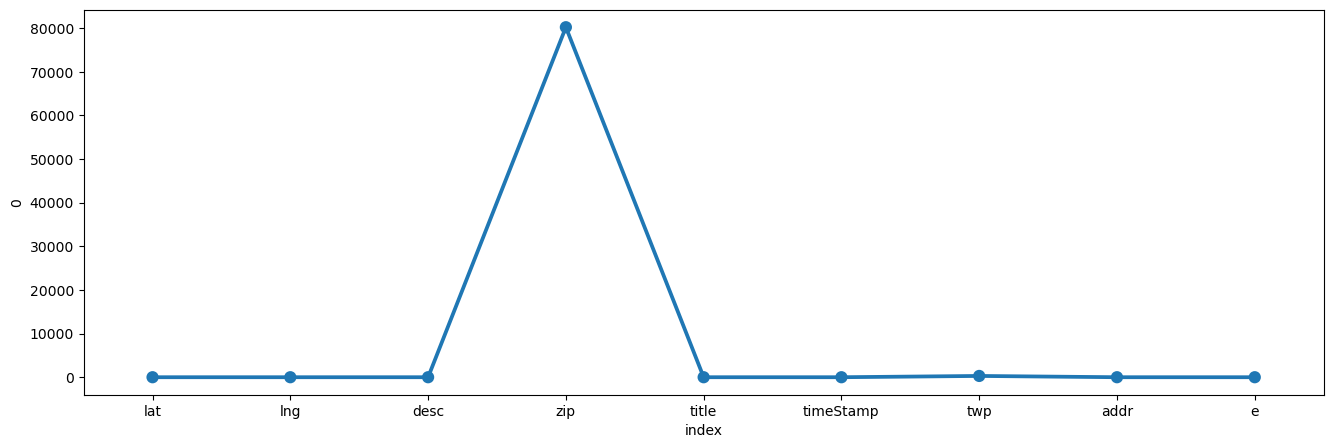

In [9]:
null= pd.DataFrame(df_call.isnull().sum()).reset_index()

print(null.head())
plt.figure(figsize=(16,5))

sns.pointplot(null, x= 'index',y=0)
plt.show()

Lets extract some of unique values from the data. The 'title' column unique value might shine some insghts- quick description from operator

In [10]:
df_call['title'].nunique()

148

In [11]:
df_call.title.head()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [12]:
df_call['Reason']= df_call['title'].apply(lambda x: x.split(':')[0])

In [13]:
df_call.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [14]:
print(df_call['Reason'].unique())

print(f"{df_call['Reason'].nunique()} unique values in Reason column")

['EMS' 'Fire' 'Traffic']
3 unique values in Reason column


In [15]:
df_call['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

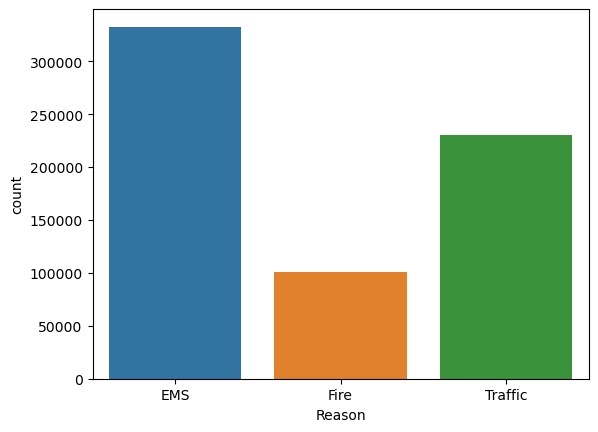

In [16]:
sns.countplot(data=df_call,x='Reason')

In [17]:
type(df_call['timeStamp'].iloc[0])


str

let's change timestamp str type to datetime 

In [18]:
df_call['timeStamp']= pd.to_datetime(df_call['timeStamp'])

In [19]:
df_call['timeStamp'].head()

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]

df_call['Date']= df_call['timeStamp'].apply(lambda x: x.split(" ")[0])
df_call['Month']= df_call['Date'].apply(lambda x: x.split("-")[1])

df_call['Date']= pd.to_datetime(df_call['Date'])
monthmap={1:'Jan', 2:'Feb',3: 'Mar',4: 'Apr', 5:'May',6: 'Jun',7: 'Jul', 8:'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}
df_call['Month_str']= df_call['Date'].apply(lambda x: x.month).map(monthmap)
#df_call['Day']= df_call['Date'].apply(lambda x: x.split("-")[2])


df_call['Time']= df_call['timeStamp'].apply(lambda x: x.split(" ")[1])
df_call['Hour']= df_call['Time'].apply(lambda x: x.split(":")[0])

In [20]:
df_call['Date']= df_call['timeStamp'].apply(lambda x:x.date())
df_call['Time']= df_call['timeStamp'].apply(lambda x:x.time())
df_call['Day']= df_call['timeStamp'].apply(lambda x:x.dayofweek)
df_call['Hours']= df_call['timeStamp'].apply(lambda x:x.hour)
df_call['Month']= df_call['Date'].apply(lambda x:x.month)
df_call['Year']= df_call['Date'].apply(lambda x:x.year)


dmap= {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
df_call['Day']= df_call['Day'].map(dmap)

monthmap={1:'Jan', 2:'Feb',3: 'Mar',4: 'Apr', 5:'May',6: 'Jun',7: 'Jul', 8:'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}
df_call['Month_str']= df_call['Month'].map(monthmap)

In [21]:
df_call.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Date,Time,Day,Hours,Month,Year,Month_str
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10,17:10:52,Wed,17,12,2015,Dec
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10,17:29:21,Wed,17,12,2015,Dec
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10,14:39:21,Wed,14,12,2015,Dec
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10,16:47:36,Wed,16,12,2015,Dec
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10,16:56:52,Wed,16,12,2015,Dec


lets graph the weekdays with Reason for call

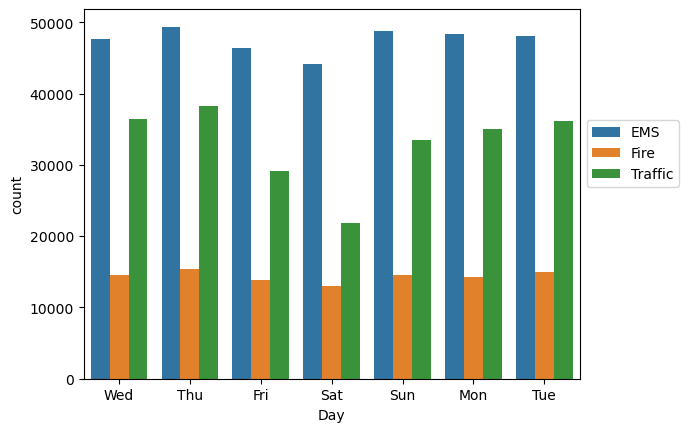

In [22]:
import seaborn as sns

sns.countplot(data= df_call,x='Day',hue='Reason')
plt.legend(loc='lower left',bbox_to_anchor=(1.0,0.5))


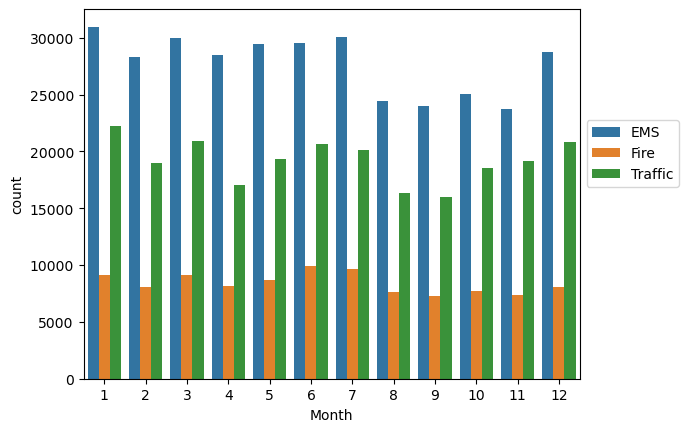

In [23]:

sns.countplot(data= df_call,x='Month',hue='Reason')
plt.legend(loc='lower left',bbox_to_anchor=(1.0,0.5))


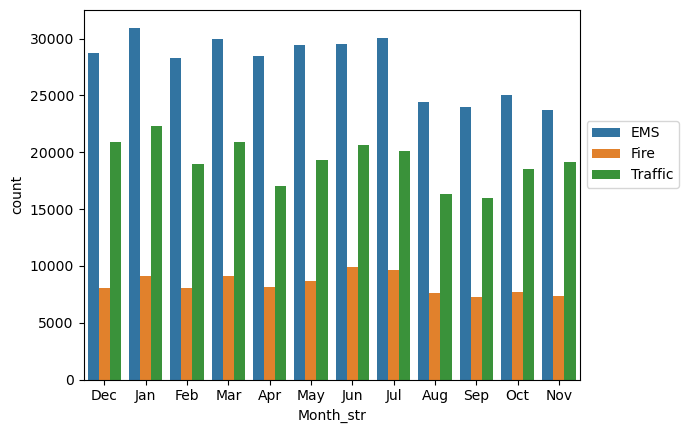

In [24]:
sns.countplot(data= df_call,x='Month_str',hue='Reason')
plt.legend(loc='lower left',bbox_to_anchor=(1.0,0.5))

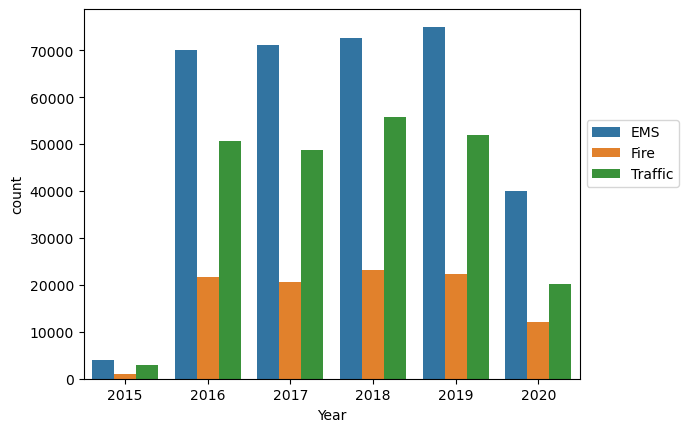

In [25]:
sns.countplot(data= df_call,x='Year',hue='Reason')
plt.legend(loc='lower left',bbox_to_anchor=(1.0,0.5))

lets group by months and analyse it

In [26]:
dummy_data= df_call.copy()

dummy_data.drop(columns=['lat','lng','zip','title','addr','e','Month_str']).groupby('Month').count().reset_index()

,Month,desc,timeStamp,twp,Reason,Date,Time,Day,Hours,Year
0,1,62336,62336,62312,62336,62336,62336,62336,62336,62336
1,2,55427,55427,55405,55427,55427,55427,55427,55427,55427
2,3,60027,60027,60001,60027,60027,60027,60027,60027,60027
3,4,53671,53671,53655,53671,53671,53671,53671,53671,53671
4,5,57509,57509,57474,57509,57509,57509,57509,57509,57509
5,6,60034,60034,60005,60034,60034,60034,60034,60034,60034
6,7,59832,59832,59802,59832,59832,59832,59832,59832,59832
7,8,48359,48359,48335,48359,48359,48359,48359,48359,48359
8,9,47213,47213,47196,47213,47213,47213,47213,47213,47213
9,10,51240,51240,51220,51240,51240,51240,51240,51240,51240


<Axes: xlabel='Month'>

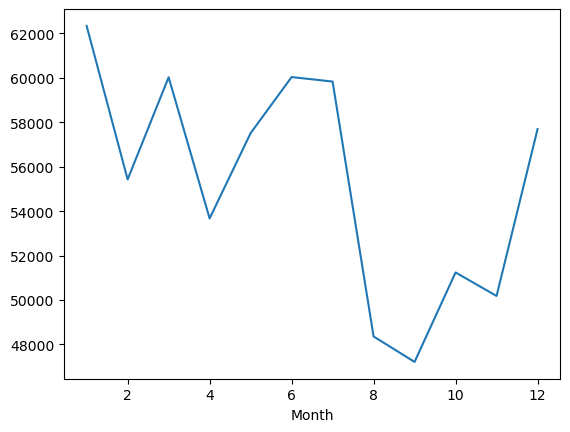

In [27]:
dummy_data.groupby('Month').count().plot(y='title',legend=None,kind='line',use_index=True)

<Axes: xlabel='DMY'>

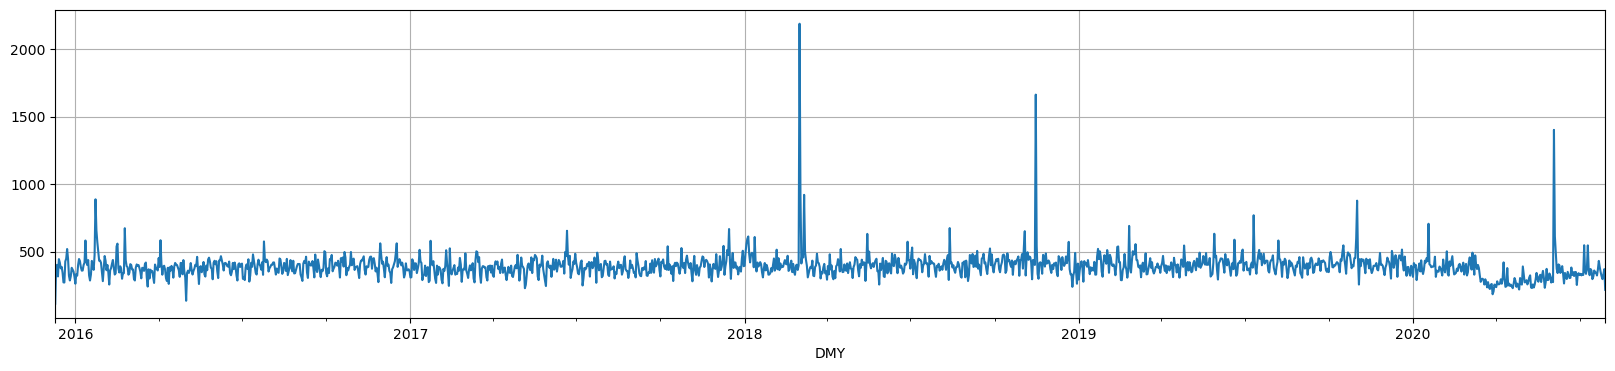

In [28]:

df_call['DMY']= df_call['timeStamp'].dt.to_period('d') 
df_call.groupby('DMY').count().plot(kind='line',use_index=True,y='title',figsize=(20,4),grid=True,legend=None)

lets check for outliers

<Axes: xlabel='Date'>

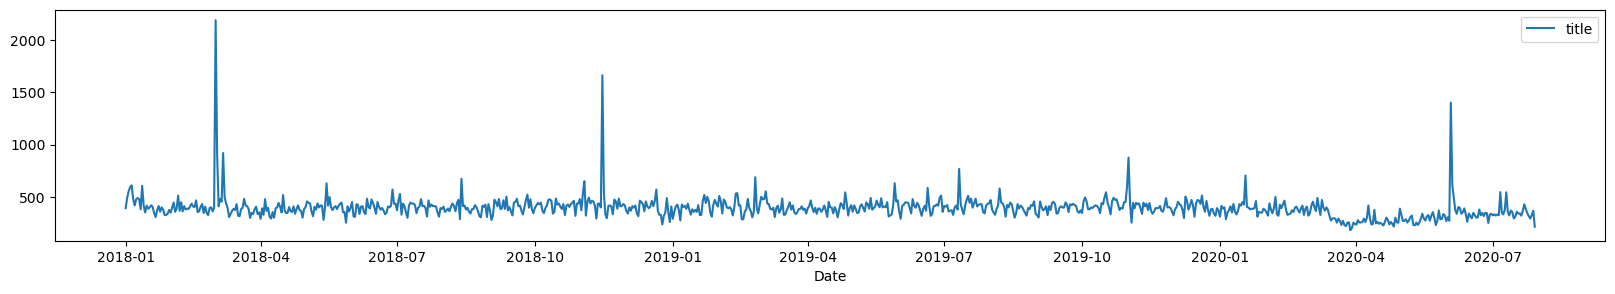

In [29]:
#filter year>=2018

df_call[df_call['timeStamp'].dt.year>=2018].groupby('Date').count().plot(kind='line',use_index=True,y='title',figsize=(20,3))

df1,data frame below represents Year:2018 or greater only and months>=3

# 

In [30]:
df1=df_call[df_call['timeStamp'].dt.year>=2018][df_call[df_call['timeStamp'].dt.year>=2018]['timeStamp'].dt.month==3]


In [31]:
df1.groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Time,Day,Hours,Month,Year,Month_str,DMY
Date,,,,,,,,,,,,,,,,,
2018-03-01,396,396,396,354,396,396,396,396,396,396,396,396,396,396,396,396,396
2018-03-02,2187,2187,2187,1986,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187
2018-03-03,917,917,917,836,917,917,917,917,917,917,917,917,917,917,917,917,917
2018-03-04,412,412,412,369,412,412,412,412,412,412,412,412,412,412,412,412,412
2018-03-05,484,484,484,439,484,484,484,484,484,484,484,484,484,484,484,484,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,260,260,260,240,260,260,260,260,260,260,260,260,260,260,260,260,260
2020-03-28,184,184,184,155,184,184,184,184,184,184,184,184,184,184,184,184,184
2020-03-29,204,204,204,187,204,204,203,204,204,204,204,204,204,204,204,204,204


In [32]:
iloc1=df1['Date'].iloc[1]

In [33]:
type(iloc1)

datetime.date

<Axes: >

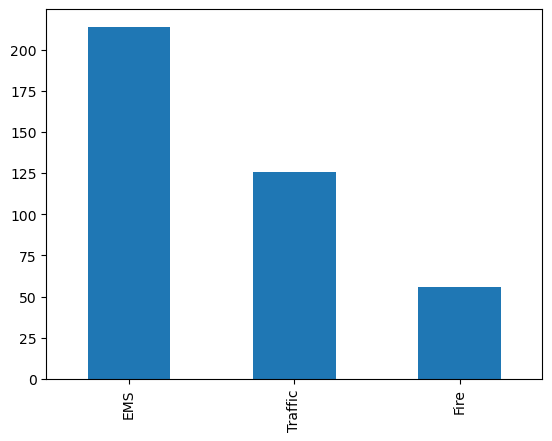

In [34]:

df_call[df_call['Date']== iloc1]['Reason'].value_counts().plot(kind='bar')


In [35]:
df2=df_call[df_call['timeStamp'].dt.year>=2018][df_call[df_call['timeStamp'].dt.year>=2018]['timeStamp'].dt.month==11]


df2 represents dataframe for the year 2018 or higher and for the month of Nov

In [36]:
iloc2=df2['Date'].iloc[0]

<Axes: >

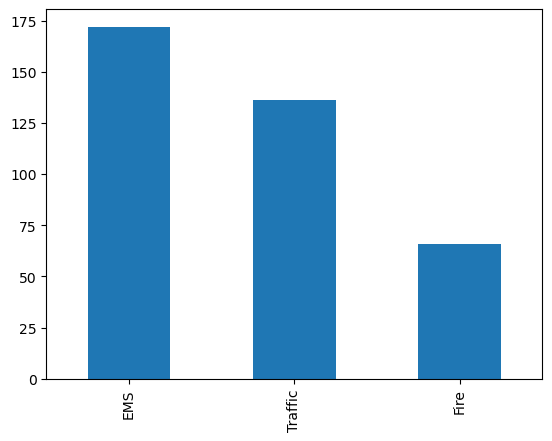

In [37]:
df_call[df_call['Date']== iloc2]['Reason'].value_counts().plot(kind='bar')


In [38]:
df_call.groupby(['Date','Reason']).count().unstack()

lat               lng              desc               zip  ...  \
Reason      EMS Fire Traffic  EMS Fire Traffic  EMS Fire Traffic  EMS  ...   
Date                                                                   ...   
2015-12-10   58   15      41   58   15      41   58   15      41   53  ...   
2015-12-11  186   68     137  186   68     137  186   68     137  166  ...   
2015-12-12  188   69     145  188   69     145  188   69     145  170  ...   
2015-12-13  191   50      75  191   50      75  191   50      75  179  ...   
2015-12-14  221   39     184  221   39     184  221   39     184  200  ...   
...         ...  ...     ...  ...  ...     ...  ...  ...     ...  ...  ...   
2020-07-25  181   56      81  181   56      81  181   56      81  165  ...   
2020-07-26  163   45      88  163   45      88  163   45      88  153  ...   
2020-07-27  184   61      84  184   61      84  184   61      84  173  ...   
2020-07-28  204   64     102  204   64     102  204   64     102  192  ...   
2020-07-29  132   34      51  132   34      51  132   34      51  116  ...   

             Month Year              Month_str               DMY               
Reason     Traffic  EMS Fire Traffic       EMS Fire Traffic  EMS Fire Traffic  
Date                                                                           
2015-12-10      41   58   15      41        58   15      41   58   15      41  
2015-12-11     137  186   68     137       186   68     137  186   68     137  
2015-12-12     145  188   69     145       188   69     145  188   69     145  
2015-12-13      75  191   50      75       191   50      75  191   50      75  
2015-12-14     184  221   39     184       221   39     184  221   39     184  
...            ...  ...  ...     ...       ...  ...     ...  ...  ...     ...  
2020-07-25      81  181   56      81       181   56      81  181   56      81  
2020-07-26      88  163   45      88       163   45      88  163   45      88  
2020-07-27      84  184   61      84       184   61      84  184   61      84  
2020-07-28     102  204   64     102       204   64     102  204   64     102  
2020-07-29      51  132   34      51       132   34      51  132   34      51  

[1694 rows x 48 columns]

In [49]:
df_call.groupby(['Date','Reason']).count().unstack()

lat               lng              desc               zip  ...  \
Reason      EMS Fire Traffic  EMS Fire Traffic  EMS Fire Traffic  EMS  ...   
Date                                                                   ...   
2015-12-10   58   15      41   58   15      41   58   15      41   53  ...   
2015-12-11  186   68     137  186   68     137  186   68     137  166  ...   
2015-12-12  188   69     145  188   69     145  188   69     145  170  ...   
2015-12-13  191   50      75  191   50      75  191   50      75  179  ...   
2015-12-14  221   39     184  221   39     184  221   39     184  200  ...   
...         ...  ...     ...  ...  ...     ...  ...  ...     ...  ...  ...   
2020-07-25  181   56      81  181   56      81  181   56      81  165  ...   
2020-07-26  163   45      88  163   45      88  163   45      88  153  ...   
2020-07-27  184   61      84  184   61      84  184   61      84  173  ...   
2020-07-28  204   64     102  204   64     102  204   64     102  192  ...   
2020-07-29  132   34      51  132   34      51  132   34      51  116  ...   

             Month Year              Month_str               DMY               
Reason     Traffic  EMS Fire Traffic       EMS Fire Traffic  EMS Fire Traffic  
Date                                                                           
2015-12-10      41   58   15      41        58   15      41   58   15      41  
2015-12-11     137  186   68     137       186   68     137  186   68     137  
2015-12-12     145  188   69     145       188   69     145  188   69     145  
2015-12-13      75  191   50      75       191   50      75  191   50      75  
2015-12-14     184  221   39     184       221   39     184  221   39     184  
...            ...  ...  ...     ...       ...  ...     ...  ...  ...     ...  
2020-07-25      81  181   56      81       181   56      81  181   56      81  
2020-07-26      88  163   45      88       163   45      88  163   45      88  
2020-07-27      84  184   61      84       184   61      84  184   61      84  
2020-07-28     102  204   64     102       204   64     102  204   64     102  
2020-07-29      51  132   34      51       132   34      51  132   34      51  

[1694 rows x 48 columns]

In [94]:
(df_call.groupby(['Date','Reason']).count().unstack())['title']

Reason,EMS,Fire,Traffic
Date,,,
2015-12-10,58,15,41
2015-12-11,186,68,137
2015-12-12,188,69,145
2015-12-13,191,50,75
2015-12-14,221,39,184
...,...,...,...
2020-07-25,181,56,81
2020-07-26,163,45,88
2020-07-27,184,61,84


<Axes: xlabel='Date'>

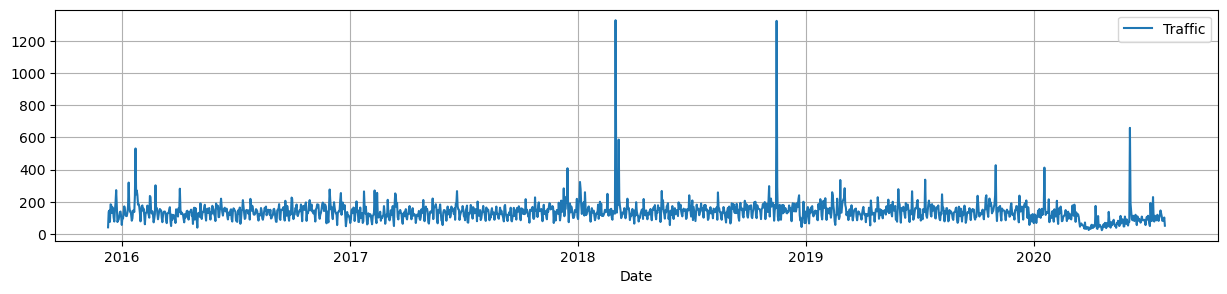

In [99]:
(df_call.groupby(['Date','Reason']).count().unstack())['title'].plot(kind='line',y='Traffic',figsize=(15,3),grid=True)

<Axes: xlabel='Date'>

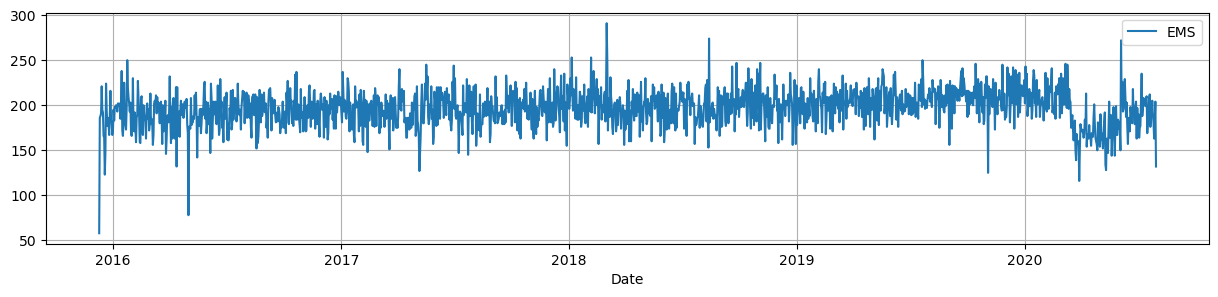

In [100]:
(df_call.groupby(['Date','Reason']).count().unstack())['title'].plot(kind='line',y='EMS',figsize=(15,3),grid=True)

<Axes: xlabel='Date'>

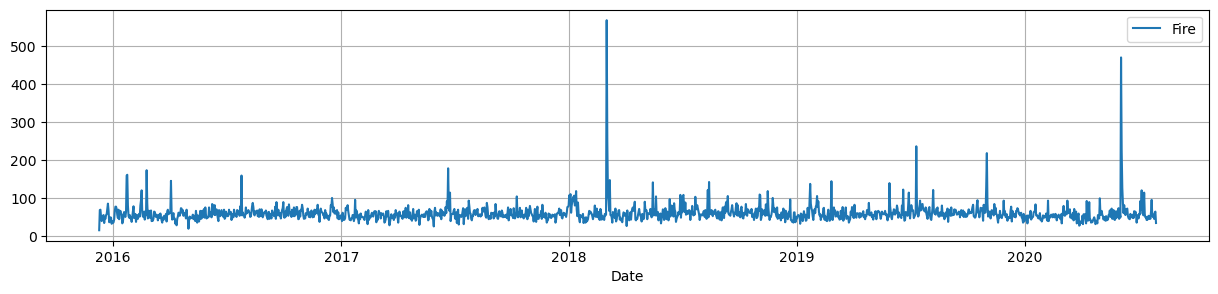

In [101]:
(df_call.groupby(['Date','Reason']).count().unstack())['title'].plot(kind='line',y='Fire',figsize=(15,3),grid=True)

We see that the first two graphs show us roughly what we expected - the traffic graph having two large outliers that we investigated earlier, and the EMS graph being about average, with the exception of a few datapoints having less than average (because these are not zero, indicating something wrong with the data, and seem like reasonable decreases, we're going to assume that they are part of the natural outliers that you would see in any dataset).

What we didn't notice until now, though, was that, along with the number of traffic calls being high on March 2, 2018, we also see that the number of calls for fire were abnormally high as well. With the count plot earlier, we were simply looking for a difference in distribution, not necessarily in quantity, over each category to denote it being abnormal. Now, however, going back to the count plot for March 2, 2018, we see that the fire count is around 600, much larger than the percieved average in the fire calls graph above. This shows the importance of checking each of the major categories in your data, especially ones that could lead you to conclusions, so that you can more accurately see what is going on. In this case, it wasn't just that severe weather most likely attributed to a higher traffic call count, it also attributed to higher fire count for March 2, 2018.

From here, another place you could explore, is the question following question: "Why were there more fire calls in the March 2,2018 weather incident but not the November 11th, 2018 weather incident?". This question is beyond the scope of this analysis but it's also worth mentioning where you could go because of this data, potentially leading to more information on how to specifically prevent more fire accidents by studying these two dates and analyzing what occured and why.

lets see the heatmap by Hours and DayOfWeek interact with 911 calls

In [106]:
df_call.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Date,Time,Day,Hours,Month,Year,Month_str,DMY
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10,17:10:52,Wed,17,12,2015,Dec,2015-12-10


In [116]:
dfht= df_call.groupby(['Day','Hours']).count().unstack()['title']

Hours,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Mon,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Sat,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Sun,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Thu,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Tue,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207
Wed,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


<Axes: xlabel='Hours', ylabel='Day'>

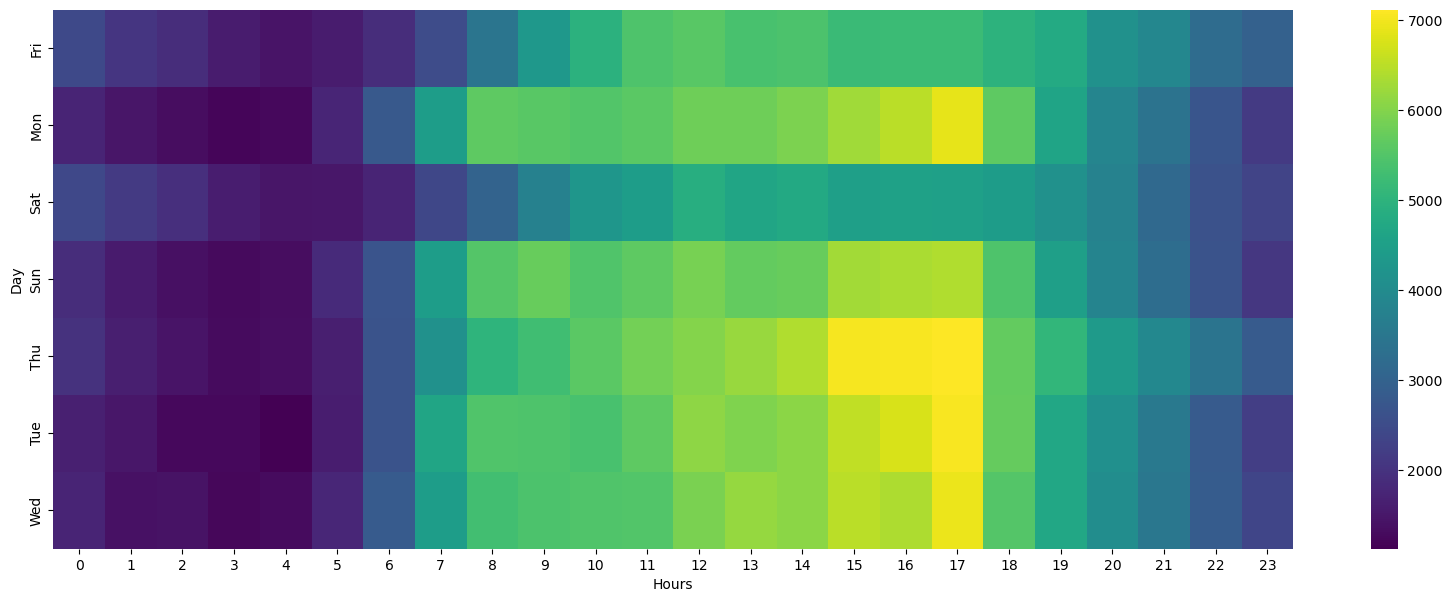

In [120]:
plt.figure(figsize=(20,7))
sns.heatmap(dfht,cmap='viridis')

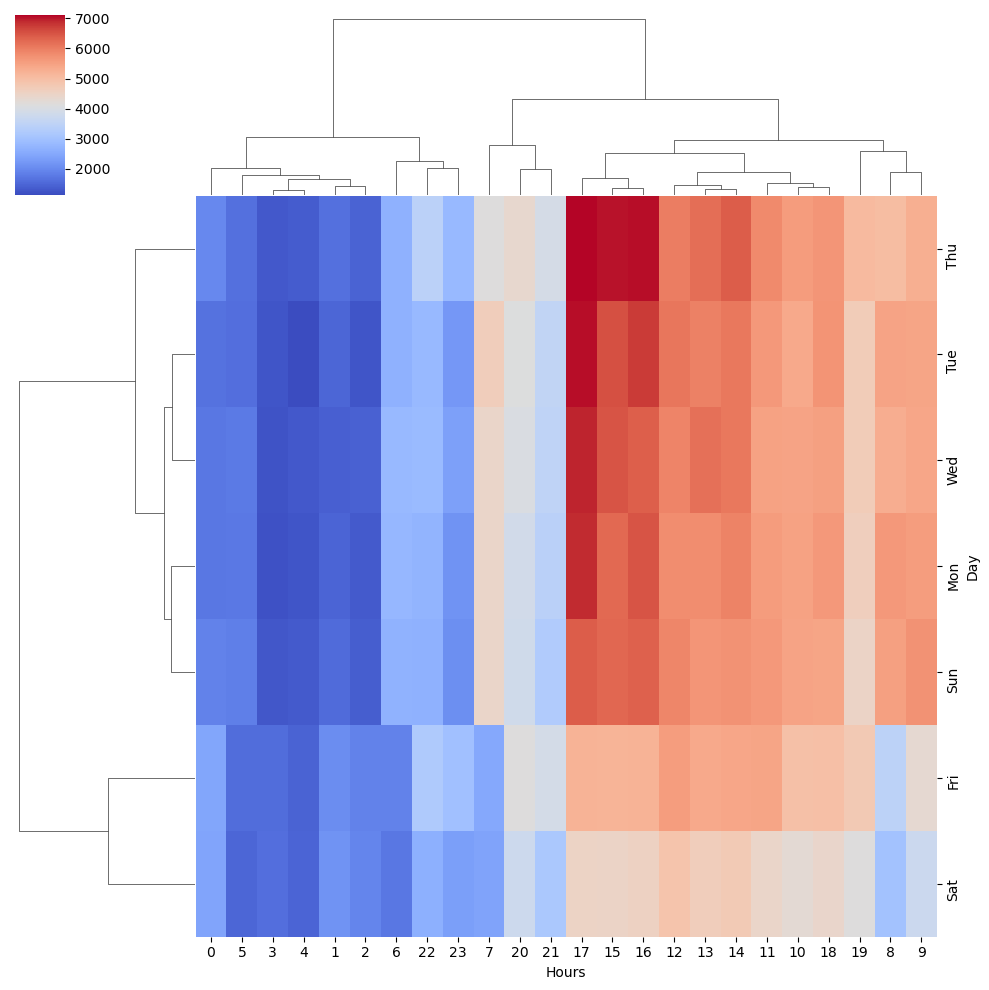

In [121]:
sns.clustermap(dfht,cmap='coolwarm')

clustermap clearly shows that most of incidents occur between 09:00 to 17:00

lets create heatmap according to month

In [124]:
df_call.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Date,Time,Day,Hours,Month,Year,Month_str,DMY
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10,17:10:52,Wed,17,12,2015,Dec,2015-12-10


In [128]:
dfmt= df_call.groupby(['Day','Month_str']).count().unstack()['title']

In [129]:
dfmt.head()

Month_str,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Day,,,,,,,,,,,,
Fri,7514,6111,8592,7593,8475,7748,8198,8050,7223,6773,6609,6566
Mon,7561,7291,8305,8087,9714,9086,8349,8372,9026,7344,7948,6601
Sat,6865,5275,7165,6452,7478,7859,6837,6766,6694,5196,6316,5956
Sun,8410,6854,8492,8747,8896,9499,8511,8060,7881,6722,8075,6598
Thu,7997,7336,9305,8255,9309,8681,9207,10941,8904,8379,6934,7694


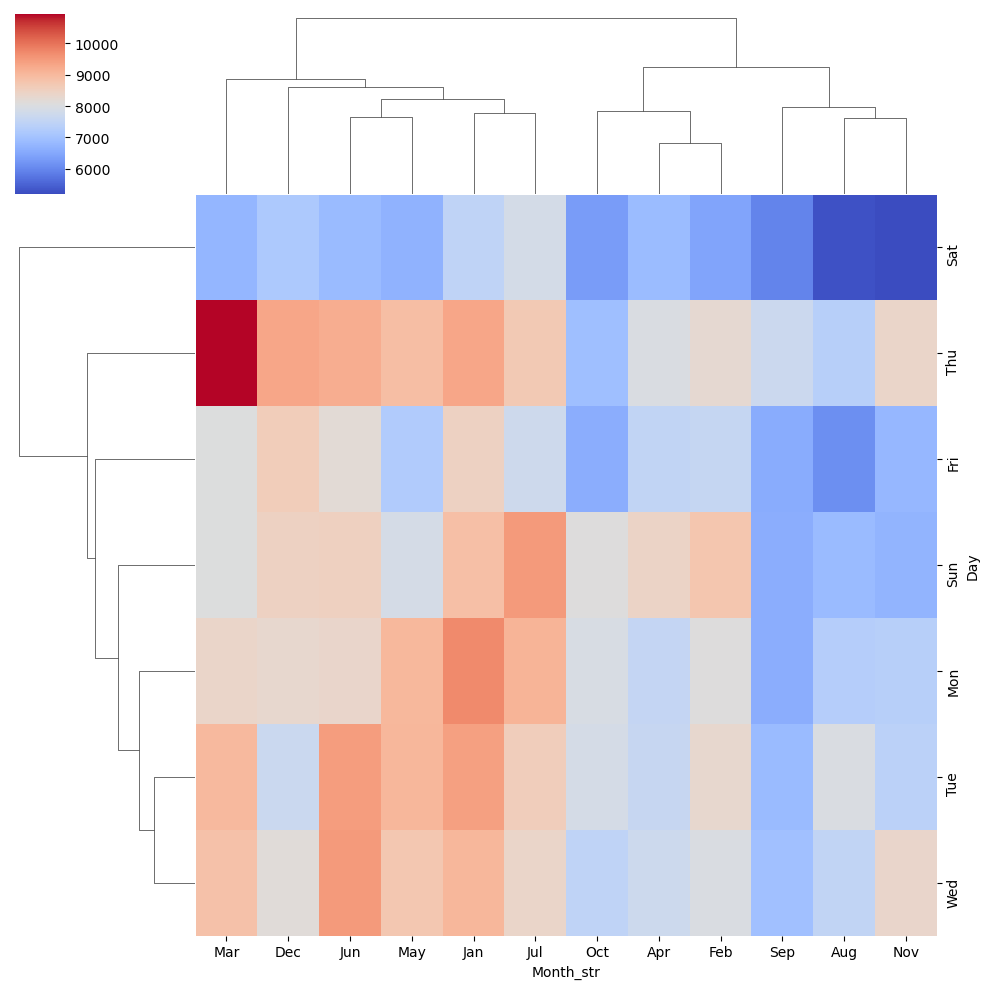

In [130]:
sns.clustermap(dfmt,cmap='coolwarm')

Most of incidents happened on the month of Jan,May, Jun, Dec, Mar